# Sesi 4: Clustering Algorithms

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

import warnings
warnings.simplefilter('ignore')

In [52]:
plt.style.use('seaborn')

# KMeans

## Generate Data

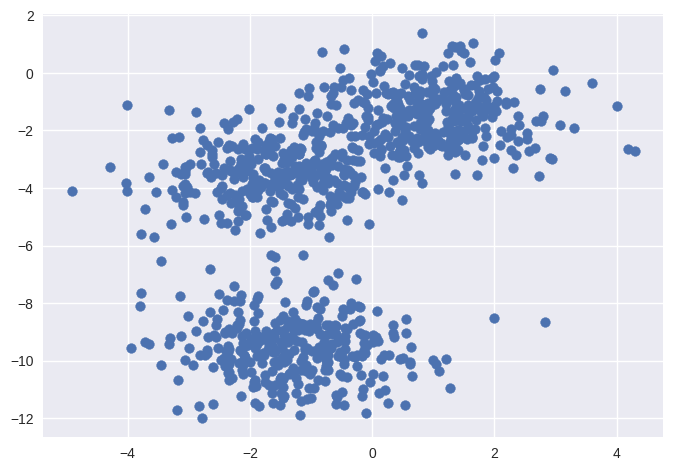

In [57]:
X, _ = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=2)

#plot the data
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [59]:
preview_data = pd.DataFrame({
    'fitur 1':X[:,0],
    'fitur 2':X[:,1],
})
preview_data

,fitur 1,fitur 2
0,-0.552723,-1.912455
1,-1.541116,-3.436230
2,-1.827574,-5.563154
3,-0.896897,-9.898470
4,0.777825,-1.738007
...,...,...
995,2.734474,-3.596585
996,-2.781142,-11.996915
997,-3.038319,-3.284770
998,-0.466904,0.827231


We don't have **target/labels (y)** since this is an **unsupervised** problem.

## Generate Clusters

In [78]:
from sklearn.cluster import KMeans
k = 3
km = KMeans(n_clusters=k, init='random', max_iter=300, random_state=20)
y = km.fit_predict(X)

You can explore more here: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [80]:
preview_cluster_data = pd.DataFrame({
    'centroid pada fitur 1 (sumbu x)':km.cluster_centers_[:,0],
    'centroid pada fitur 2 (sumbu y)':km.cluster_centers_[:,1],
    'cluster':list(range(k))
})
preview_cluster_data

,centroid pada fitur 1 (sumbu x),centroid pada fitur 2 (sumbu y),cluster
0,-1.614649,-3.549050,0
1,0.992532,-1.397277,1
2,-1.277104,-9.557417,2


In [81]:
preview_data = pd.DataFrame({
    'fitur 1':X[:,0],
    'fitur 2':X[:,1],
    'cluster':y
})
preview_data

,fitur 1,fitur 2,cluster
0,-0.552723,-1.912455,1
1,-1.541116,-3.436230,0
2,-1.827574,-5.563154,0
3,-0.896897,-9.898470,2
4,0.777825,-1.738007,1
...,...,...,...
995,2.734474,-3.596585,1
996,-2.781142,-11.996915,2
997,-3.038319,-3.284770,0
998,-0.466904,0.827231,1


## Visualize

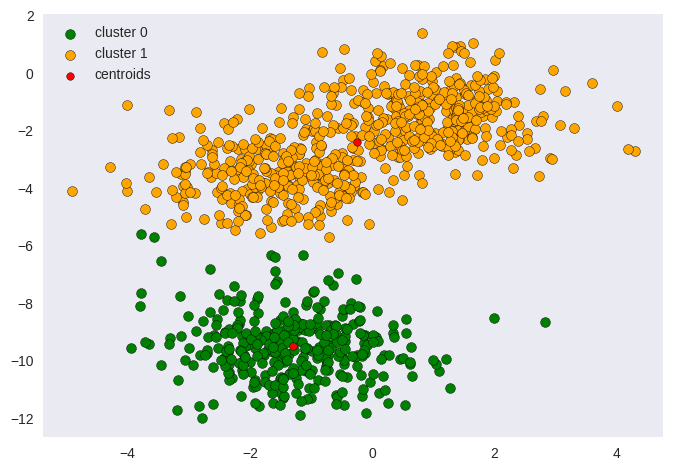

In [72]:
# plot the 3 clusters

# cluster berwarna hijau atau cluster 0
plt.scatter(
    X[y == 0, 0], X[y == 0, 1],
    s=50, c='green', edgecolor='black',
    label='cluster 0'
)

# cluster berwarna orange atau cluster 1
plt.scatter(
    X[y == 1, 0], X[y == 1, 1],
    s=50, c='orange', edgecolor='black',
    label='cluster 1'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=30, c='red', edgecolor='black', label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid(False)
plt.show()

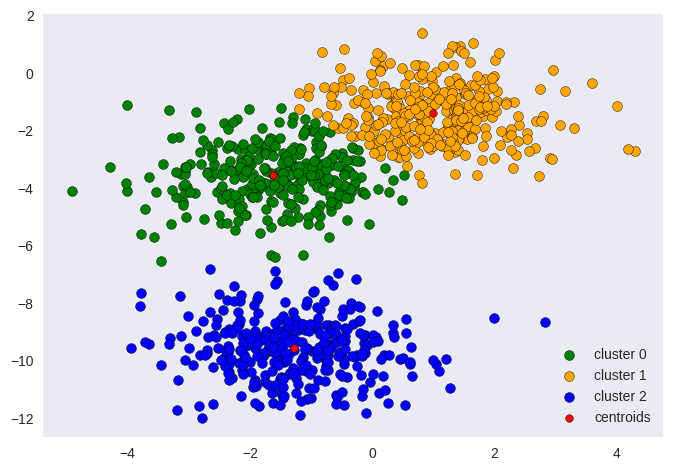

In [66]:
# plot the 3 clusters

# cluster berwarna hijau atau cluster 0
plt.scatter(
    X[y == 0, 0], X[y == 0, 1],
    s=50, c='green', edgecolor='black',
    label='cluster 0'
)

# cluster berwarna orange atau cluster 1
plt.scatter(
    X[y == 1, 0], X[y == 1, 1],
    s=50, c='orange', edgecolor='black',
    label='cluster 1'
)

# cluster berwarna biru atau cluster 2
plt.scatter(
    X[y == 2, 0], X[y == 2, 1],
    s=50, c='blue', edgecolor='black',
    label='cluster 2'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=30, c='red', edgecolor='black', label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid(False)
plt.show()

### Elbow Method

In [74]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random', max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_) 
    # Inertia is the sum of squared distances of samples to their closest cluster center.

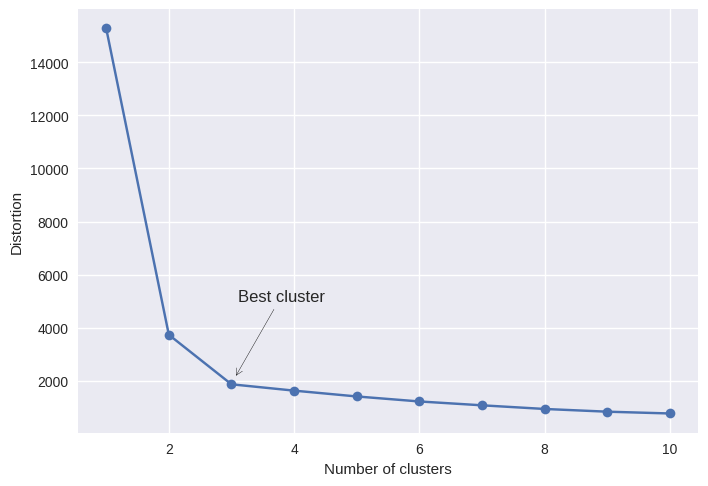

In [77]:
# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.annotate('Best cluster', xy=(3.05, 2100), xytext=(3.1, 5000),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# Elbow method shows that the best K is 3

# Agglomerative Hierarchical

## Generate Data

In [82]:
# create dataset
X, _ = make_blobs(n_samples=5, n_features=2, 
                  centers=3, cluster_std=1, 
                  shuffle=True, random_state=42)

preview_data = pd.DataFrame({
                    'fitur 1':X[:,0],
                    'fitur 2':X[:,1],
                    'index':list(range(0,len(X)))
                })

preview_data

,fitur 1,fitur 2,index
0,-0.929985,9.781721,0
1,4.881841,0.059889,1
2,-2.978672,9.556846,2
3,-8.604545,-7.442397,3
4,4.176461,1.507440,4


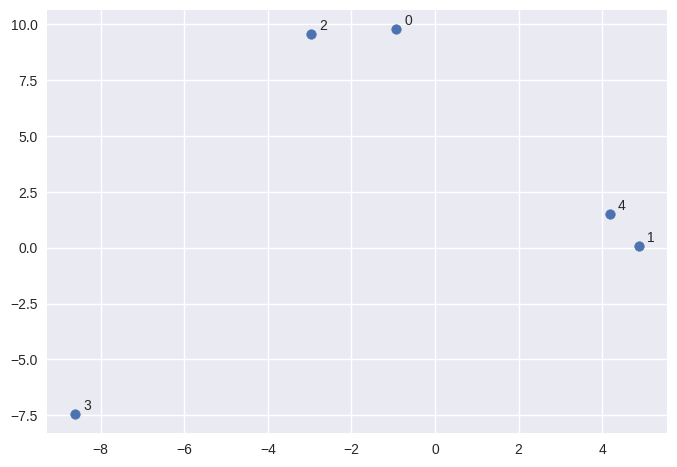

In [83]:
# plot
plt.scatter(X[:, 0], X[:, 1])

txt_gap = 0.2
for i, txt in enumerate(preview_data['index']):
    plt.annotate(txt, (X[i,0] + txt_gap, X[i,1] + txt_gap))

plt.show()

## Generate Clusters

In [91]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering()
y = agg.fit_predict(X)

You can explore more here: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

## Visualize Using Dendogram

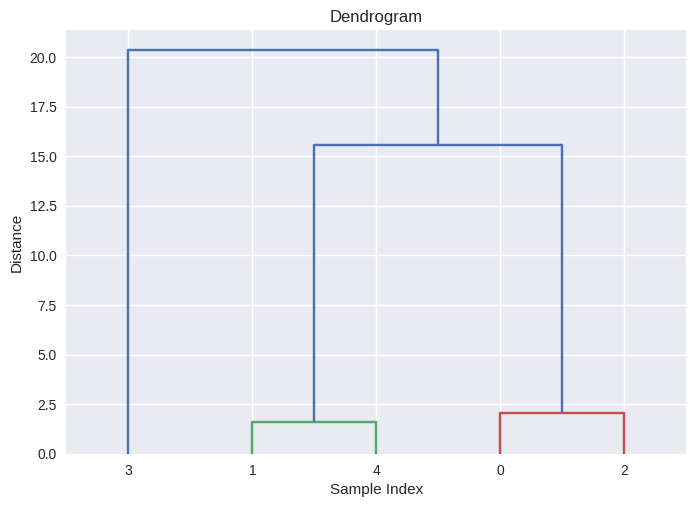

In [92]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
# Generate the linkage matrix
linkage_matrix = linkage(X, method='ward')
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(linkage_matrix, labels=np.arange(len(X)), leaf_font_size=10)
plt.show()

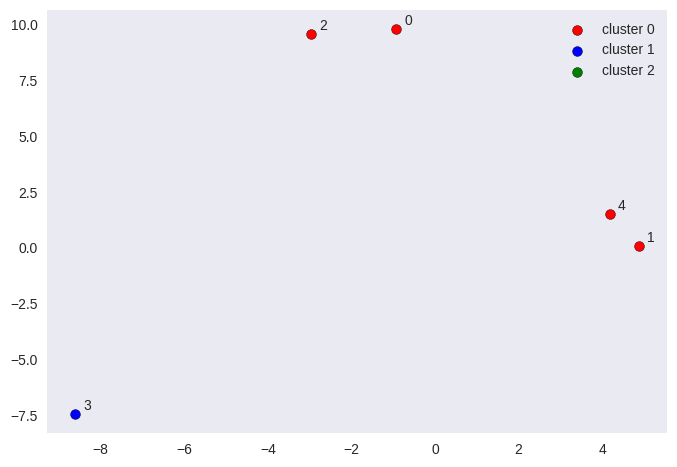

In [93]:
# plot the 3 clusters

# cluster berwarna merah atau cluster 0
plt.scatter(
    X[y == 0, 0], X[y == 0, 1],
    s=50, c='red', edgecolor='black',
    label='cluster 0'
)

# cluster berwarna biru atau cluster 1
plt.scatter(
    X[y == 1, 0], X[y == 1, 1],
    s=50, c='blue', edgecolor='black',
    label='cluster 1'
)

# cluster berwarna hijau atau cluster 2
plt.scatter(
    X[y == 2, 0], X[y == 2, 1],
    s=50, c='green', edgecolor='black',
    label='cluster 2'
)

txt_gap = 0.2
for i, txt in enumerate(preview_data['index']):
    plt.annotate(txt, (X[i,0] + txt_gap, X[i,1] + txt_gap))

plt.legend(scatterpoints=1)
plt.grid(False)
plt.show()

# DBSCAN

## Generate Data

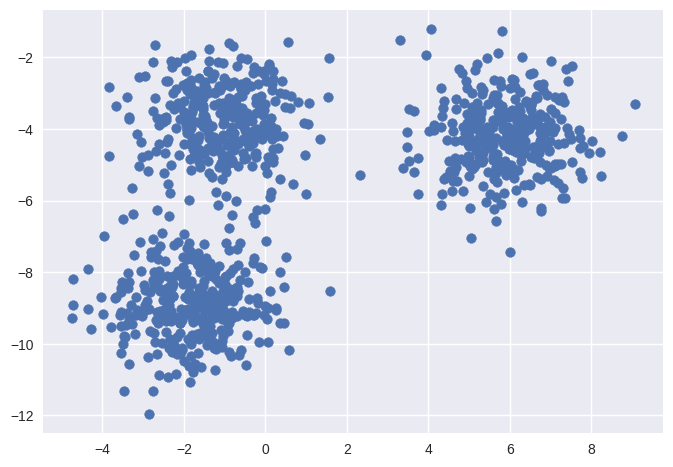

In [94]:
X, _ = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=40)

#plot the data
plt.scatter(X[:, 0], X[:, 1])
plt.show()

## Generate Clusters

In [100]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.4, min_samples=10).fit(X)

You can explore more here: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN

## Visualize

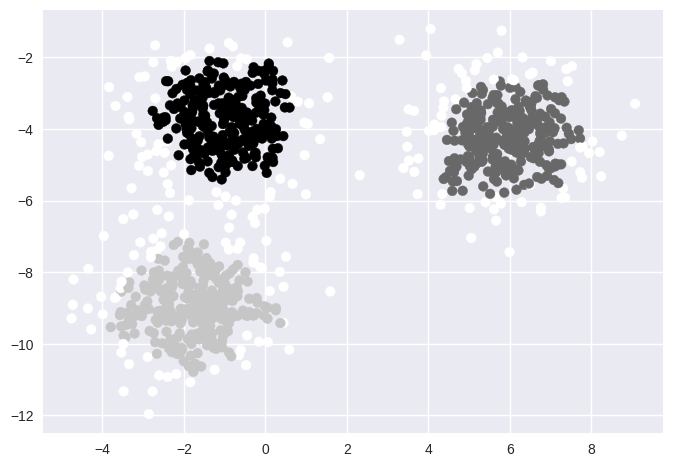

In [101]:
#plot the result
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_)
plt.show()

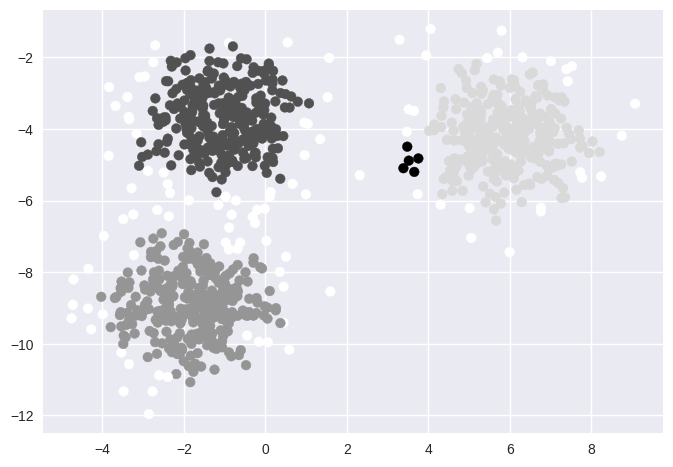

In [99]:
#plot the result
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_)
plt.show()